<a href="https://colab.research.google.com/github/grmanjar-cmyk/mlb_wrc_plus_model/blob/main/Whiff_percent_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
upload = files.upload()

Saving statscast_pitching_leaders_2025.csv to statscast_pitching_leaders_2025 (1).csv


In [15]:

!pip install pybaseball

import pybaseball
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_statscast_pitching = pd.read_csv('statscast_pitching_leaders_2025.csv')

In [17]:
df_statscast_pitching.columns


Index(['last_name, first_name', 'player_id', 'year', 'pa', 'k_percent',
       'avg_best_speed', 'whiff_percent', 'arm_angle', 'fastball_avg_speed',
       'fastball_avg_spin', 'fastball_avg_break_x', 'fastball_avg_break_z',
       'fastball_avg_break_z_induced', 'breaking_avg_speed',
       'breaking_avg_spin', 'breaking_avg_break_x', 'breaking_avg_break_z',
       'breaking_avg_break_z_induced', 'breaking_range_speed',
       'offspeed_avg_speed', 'offspeed_avg_spin', 'offspeed_avg_break_x',
       'offspeed_avg_break_z', 'offspeed_avg_break_z_induced',
       'offspeed_range_speed'],
      dtype='object')

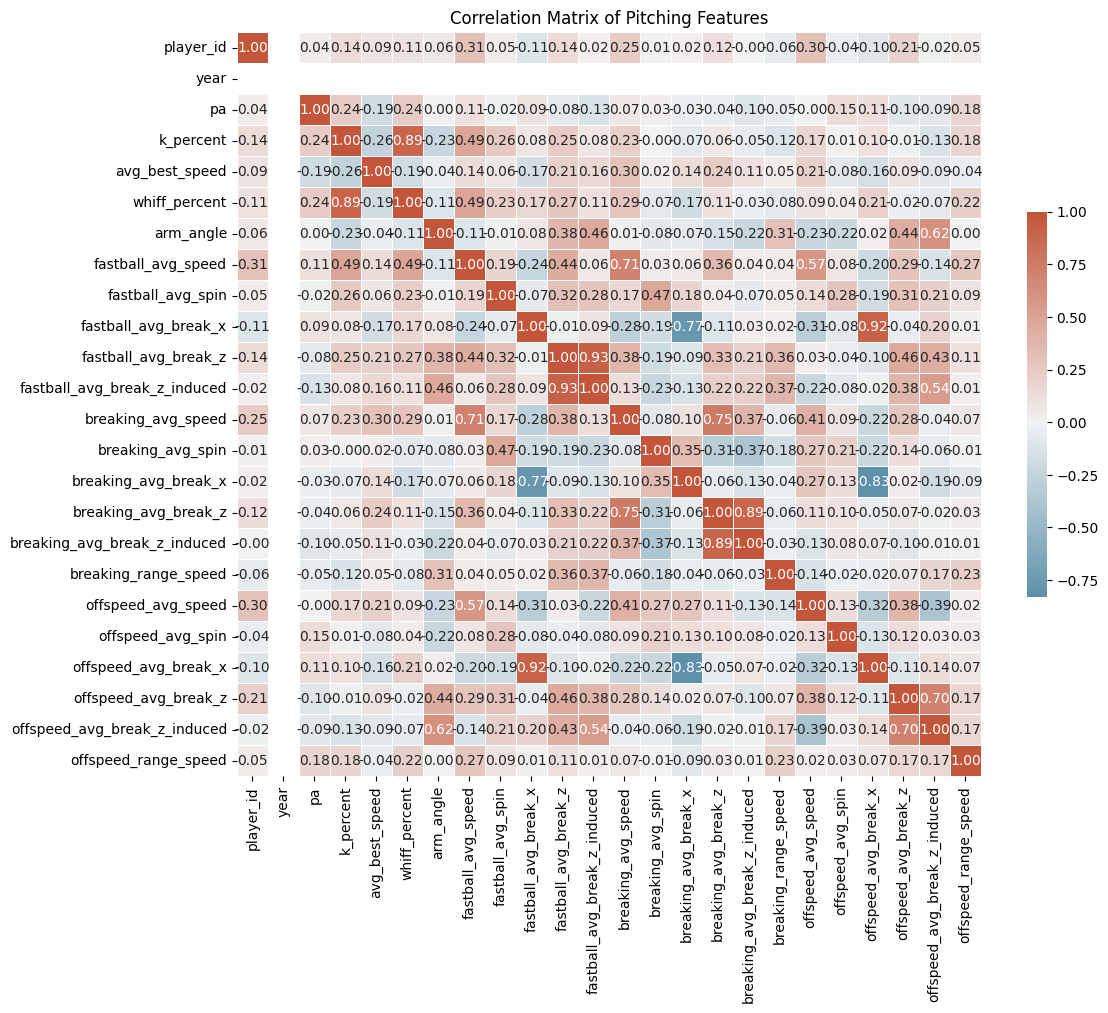

In [18]:
# Calculate the correlation matrix, IGNORING non-numeric columns

corr = df_statscast_pitching.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Pitching Features')
plt.show()

In [19]:
# First, let's define our target variable
y = df_statscast_pitching['whiff_percent']

In [21]:
# Next, create a list of the feature names we want to use.
# We are intentionally excluding 'k_percent' and 'fastball_avg_break_z_induced'.
# We also exclude identifiers like player names, IDs, and year.
features_to_include = [

    'arm_angle',
    'fastball_avg_speed',
    'fastball_avg_spin',
    'fastball_avg_break_x',
    'fastball_avg_break_z_induced',
    'breaking_avg_speed',
    'breaking_avg_spin',
    'breaking_avg_break_x',
    'breaking_avg_break_z_induced',
    'breaking_range_speed',
    'offspeed_avg_speed',
    'offspeed_avg_spin',
    'offspeed_avg_break_x',
    'offspeed_avg_break_z_induced',
    'offspeed_range_speed'
]

In [22]:
# Now, create our feature DataFrame (X) using this list
X = df_statscast_pitching[features_to_include]

# You can check the first few rows to confirm it looks correct
print("Target variable (y) shape:", y.shape)
print("Feature matrix (X) shape:", X.shape)
print("\nFirst 5 rows of X:")
print(X.head())

Target variable (y) shape: (107,)
Feature matrix (X) shape: (107, 15)

First 5 rows of X:
   arm_angle  fastball_avg_speed  fastball_avg_spin  fastball_avg_break_x  \
0       36.7                94.5               2260                 -11.1   
1       42.8                92.7               2185                 -11.0   
2       15.1                94.9               2154                 -14.8   
3       39.4                91.9               2014                 -10.0   
4       39.5                95.2               2235                  -7.2   

   fastball_avg_break_z_induced  breaking_avg_speed  breaking_avg_spin  \
0                          16.8                83.2               2334   
1                          12.8                82.6               2409   
2                           9.6                84.5               2249   
3                          14.6                86.0               2194   
4                          13.2                84.9               2567   

  

In [23]:
from sklearn.model_selection import train_test_split

# --- 1. Define Target and Features ---
# Define the target variable (what we want to predict)
y = df_statscast_pitching['whiff_percent']

# Use the feature list you just provided
features_to_include = [
    'arm_angle',
    'fastball_avg_speed',
    'fastball_avg_spin',
    'fastball_avg_break_x',
    'fastball_avg_break_z_induced',
    'breaking_avg_speed',
    'breaking_avg_spin',
    'breaking_avg_break_x',
    'breaking_avg_break_z_induced',
    'breaking_range_speed',
    'offspeed_avg_speed',
    'offspeed_avg_spin',
    'offspeed_avg_break_x',
    'offspeed_avg_break_z_induced',
    'offspeed_range_speed'
]

# Create the feature DataFrame (X)
X = df_statscast_pitching[features_to_include]

In [25]:
# --- 2. Split the Data ---
# We'll split the data into 80% for training and 20% for testing.
# 'random_state=42' ensures that we get the same split every time we run the code,
# making our results reproducible.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
# --- 3. Verify the Split ---
# Let's print the shapes of the new datasets to confirm the split was successful.
print("Shape of original feature matrix (X):", X.shape)
print("-----------------------------------------")
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("-----------------------------------------")
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

Shape of original feature matrix (X): (107, 15)
-----------------------------------------
Shape of training features (X_train): (85, 15)
Shape of testing features (X_test): (22, 15)
-----------------------------------------
Shape of training target (y_train): (85,)
Shape of testing target (y_test): (22,)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1. Initialize the Model ---
# We'll start with the default parameters. 'n_estimators=100' means it will build 100 decision trees.
# 'random_state=42' ensures the model's randomness is the same each time, for reproducibility.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
# --- 2. Train the Model ---
# We "fit" the model to our training data. This is the learning step.
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


In [29]:
# --- 3. Make Predictions on the Test Set ---
# Now we use our trained model to predict whiff_percent for the unseen test data.
y_pred = rf_model.predict(X_test)

In [30]:
# --- 4. Evaluate Model Performance ---
# We'll compare the model's predictions (y_pred) to the actual values (y_test).

# Mean Absolute Error (MAE): The average absolute difference between the predictions and the actual values.
# A lower MAE is better. For example, an MAE of 0.02 means the model's predictions are, on average,
# off by 2 percentage points.
mae = mean_absolute_error(y_test, y_pred)

# R-squared (R²): The proportion of the variance in the target variable that is predictable
# from the features. It ranges from 0 to 1, with 1 being a perfect prediction.
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


--- Model Evaluation ---
Mean Absolute Error (MAE): 3.4365
R-squared (R²): 0.2309


In [31]:
# --- 1. Get Feature Importances ---
# The model has already calculated these during training.
importances = rf_model.feature_importances_

In [33]:
# --- 2. Create a DataFrame for Easy Plotting ---
# We'll match the importance scores with the column names.
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

In [34]:
# --- 3. Sort the Features by Importance ---
# We want to see the most important features at the top of our chart.
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

/tmp/ipython-input-1227508405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


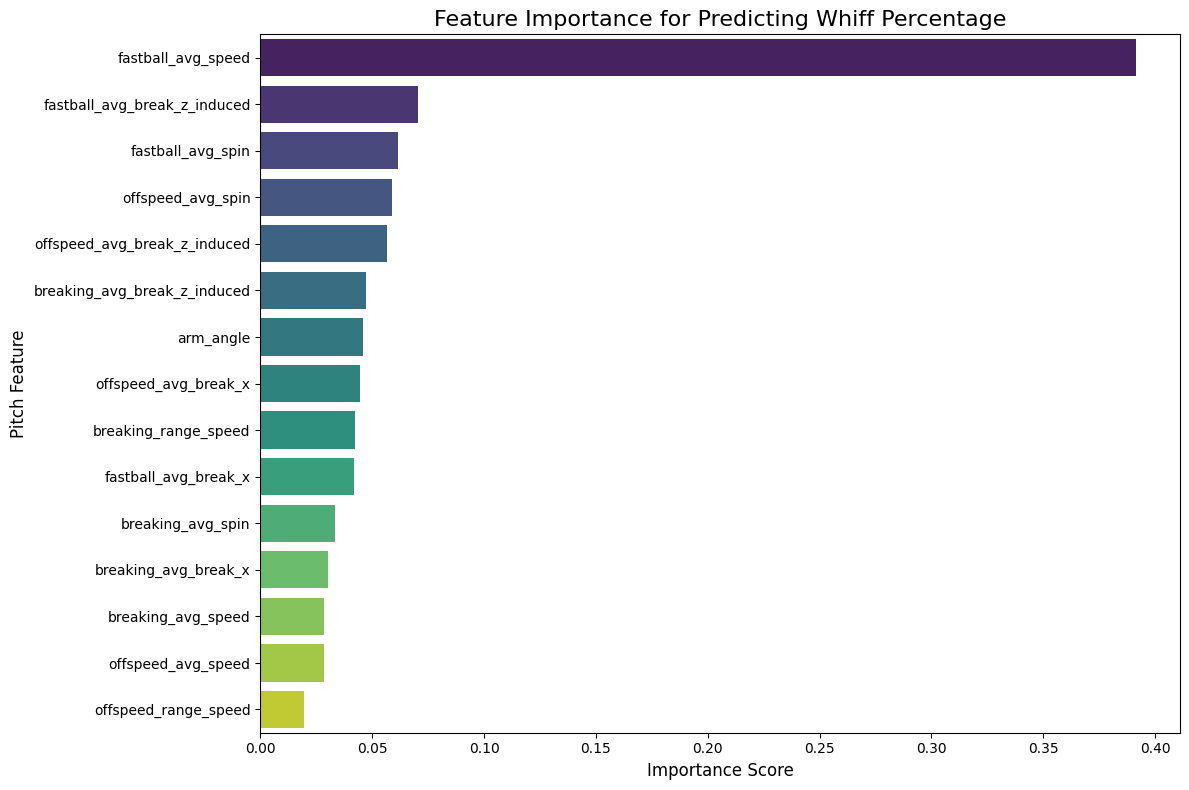

In [35]:
# --- 4. Create the Bar Plot ---
plt.figure(figsize=(12, 8)) # Set the figure size for better readability

# Use seaborn to create a nice-looking bar plot
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df,
    palette='viridis' # 'viridis' is a nice color scheme, but you can choose others
)

# Add titles and labels for clarity
plt.title('Feature Importance for Predicting Whiff Percentage', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Pitch Feature', fontsize=12)

# Show the plot
plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()